In this example we will setup the AutoPhOT pipeline to accept a custom/ user created catalog of sequence stars

The first few cells are setting up the pipeline as shown [here](https://github.com/Astro-Sean/autophot/blob/master/example_notebooks/autophot_example.ipynb)

In [17]:
import autophot
from autophot.autophot import run
from autophot.prep_input import load
from autophot.example import save_example_data
from autophot.packages.functions import getimage
from autophot.packages.functions import getheader

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from astropy import wcs
from astropy.coordinates import SkyCoord 
from astropy.visualization import ImageNormalize,SquaredStretch,ZScaleInterval


In [42]:
# Load default input yaml file
syntax = load()

# Built in function to move some example data onto the users desktop
fpath = save_example_data.save_fits_to_desktop()

# define what we want to work on
syntax['fits_dir'] = None
syntax['fname'] = fpath

# get directory path
dirpath = os.path.dirname(fpath)

print('Setting work directory (wdir) to: %s' % dirpath)

# set working directory
syntax['wdir'] = dirpath

syntax['fits_dir'] = dirpath
'''
Code will also work if we set fits_dir to the directory to our fits data 

'''

Default input loaded in from: 
/Users/seanbrennan/anaconda2/envs/conda3/lib/python3.8/site-packages/autophot/databases/default_input.yml
Successful copy of example.fits written to:
/Users/seanbrennan/Desktop/autophot_example/example.fits
Setting work directory (wdir) to: /Users/seanbrennan/Desktop/autophot_example


'\nCode will also work if we set fits_dir to the directory to our fits data \n\n'

Some photometry require the use of a non-standard sky survey, for example if can be trickly to get JC U-band sequence stars from an all-sky survey. 

AutoPhOT is prepared to handle unique custom catalogs 



In [43]:
# set the catalog key to 'custom' and enter in the filepath of your custom catalog
syntax['catalog'] = 'custom'

# this is an example sequence stars catlog .... enter the lfile path of your csv file with sequence stars
# The below file is not available through AutoPhOT
syntax['catalog_custom_fpath'] = '/Users/seanbrennan/Desktop/autophot_example/catalog_queries/custom/my_first_catalog.csv'

Although the require fields are RA and DEC (case sensitive), there are no restrictions of what filters to include.

RA and DEC given in degrees in ICRS frame

Filter name convention follows that used throughout AutoPhOT

Johnson - Cousin: U, B, V, R, I

Sloan : u, g, r, i, z

Near-Infrared : J, H, K

Any entryed filters require a corrosponding err e.g [r] and [r_err], although these errors can be set to NaN.

If you need a another filter naming convention built into AutoPhOt, please email me to set it up

In [48]:
# Print it out to show structure
my_first_catalog = pd.read_csv(syntax['catalog_custom_fpath'])
my_first_catalog.head(10)

RA        DEC       U       B       V       g       r       i  \
0  113.769167 -69.468861  17.348  17.086  16.245  16.624  15.974  15.648   
1  113.773333 -69.545083     NaN  17.431  16.119  16.753  15.627  15.114   
2  113.804167 -69.499333  14.986  14.724  13.894  14.267  13.648  13.374   
3  113.807083 -69.451472  16.902  16.672  15.851  16.215  15.615  15.303   
4  113.813750 -69.453194  17.793  17.455  16.631  17.006  16.366  16.078   
5  113.846250 -69.587750     NaN  17.067  15.755  16.393  15.242  14.747   
6  113.866250 -69.518944  16.829  16.515  15.674  16.053  15.454  15.175   
7  113.886250 -69.572333  15.082  14.980  14.279  14.597  14.102  13.857   
8  113.899583 -69.496500  17.640  16.823  15.639  16.174  15.270  14.850   
9  113.907083 -69.464639  16.210  15.976  15.180  15.538  14.970  14.701   

   U_err  B_err  V_err  g_err  r_err  i_err   R  R_err   I  I_err  
0  0.036  0.021  0.015  0.015  0.020  0.016 NaN    NaN NaN    NaN  
1    NaN  0.019  0.015  0.015  0.034  0.016 NaN    NaN NaN    NaN  
2  0.015  0.015  0.015  0.015  0.022  0.015 NaN    NaN NaN    NaN  
3  0.026  0.019  0.015  0.015  0.028  0.020 NaN    NaN NaN    NaN  
4  0.051  0.015  0.015  0.015  0.027  0.024 NaN    NaN NaN    NaN  
5    NaN  0.015  0.015  0.015  0.024  0.015 NaN    NaN NaN    NaN  
6  0.021  0.015  0.015  0.015  0.031  0.015 NaN    NaN NaN    NaN  
7  0.015  0.015  0.015  0.015  0.020  0.015 NaN    NaN NaN    NaN  
8  0.029  0.015  0.015  0.015  0.023  0.017 NaN    NaN NaN    NaN  
9  0.015  0.015  0.015  0.015  0.021  0.015 NaN    NaN NaN    NaN

To check if the the catalog we've entered is okay, we can plot out the location of the sequence stars

<ipython-input-45-269d49799d2c>:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Performing photometry on source at ra/dec = 114.070433/-69.529716


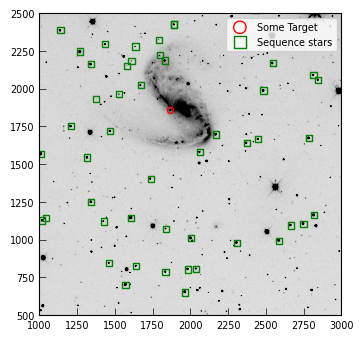

In [45]:
# get the image
data = getimage(fpath)

# header
header = getheader(fpath)

# Create an ImageNormalize object
norm = ImageNormalize(stretch = SquaredStretch())
vmin,vmax = (ZScaleInterval(nsamples = 1000)).get_limits(data)

plt.imshow(data,
          vmin = vmin,
          vmax = vmax,
          norm = norm,
          origin = 'lower',
          cmap = 'Greys')

'''
For purpose of this example WCS is already in header. 
AutoPhOT is able to call astrometry.net from a local instance although for this example we assume the user doesn't
have astrometry installed
''' 
w = wcs.WCS(header)

# Select a source - this source is not a transient although it is close to the center of the galaxy (NGC 2442)
ra = 114.070433
dec = -69.529716

# Mark location of target
c = SkyCoord(ra,dec , unit="deg") 
x_pix,y_pix = w.all_world2pix(c.ra.degree, c.dec.degree, 1)
plt.scatter(x_pix,y_pix,marker = 'o',
            facecolor = 'none',
            edgecolor = 'r',
            s = 20,
            label = 'Some Target'
           )

# Plot our sequence stars
ra_stars = my_first_catalog['RA']
dec_stars = my_first_catalog['DEC']

x_pix_stars,y_pix_stars = w.all_world2pix(ra_stars, dec_stars, 0)

plt.scatter(x_pix_stars,y_pix_stars,
            marker = 's',
            facecolor = 'none',
            edgecolor = 'g',
            s = 20,
            label = 'Sequence stars'
           )

# zoom in to better show sequence stars
plt.xlim(1000,3000)
plt.ylim(500,2500)

plt.legend(loc= 'best')

plt.show()



# Set up target source
print('Performing photometry on source at ra/dec = %.6f/%.6f' %  (c.ra.degree,c.dec.degree))

# In this case this source isn't in TNS so we leave target_name as None and update target_ra and target_dec
syntax['target_ra'] = c.ra.degree
syntax['target_dec'] = c.dec.degree

Now that we've updated the **catalog** and **catalog_custom_fpath** keys we can run AutoPhOT with using the custom catalog

In [46]:
# Run AutoPhoT as normal
run(syntax)

User instrument database: /Users/seanbrennan/Desktop/autophot_example/telescope.yml

Number of files: 1
1 telescope(s) detected - checking header keywords
Checking: EXAMPLE_TELESCOPE for unique keywords
File: example_APT.fits - PID: 80764
Start Time: 2020-06-18 12:21:57.310454
Telescope: EXAMPLE_TELESCOPE
Filter: r
Gain: 1
Exposure time: 60s 
Detecting/removing cosmic ray sources


Directory of input fits file: /Users/seanbrennan/Desktop/autophot_example

> Checking: Filters

Files removed - Wrong Image: 0


Files removed - No filter: 0


Files removed - Total: 0


+-------------+
| File: 1 / 1 |
+-------------+
Starting Astroscrappy ... working ... this may take some time ... done


Cosmic rays removed - image updated
WCS
WCS Values found
Number of sources before cleaning - [s = 100.0]: 524 
Too many sources


m: 0 :: n 0


Number of sources before cleaning - [s = 200.0]: 337 
wrong close-up size
wrong close-up size
wrong close-up size
wrong close-up size
wrong close-up size
wrong close-up size
wrong close-up size
wrong close-up size
Isolated sources found [ 200.0 sigma ]: 176
FWHM (from all sources[176]): 4.656 
Aperture correction: -0.116 +/- 0.001
Searching for viable sources
New target name: target_ra_114.0_dec_-70.0
Searching for new catalog: custom 
Catalog length: 53


Matching catalog source to image: 36 / 44

Number of sources from catalog: 44
Average pixel offset: 1.686 
Photometry
Using PSF Photometry
Limiting threshold: 5 sigma


Residual table updated: 9 / 10 e: 43 / 44

Image_radius [pix] : 8.195 +/- 0.239
FWHM of PSF model: 4.280
Approx PSF mag -7.302
Image cutout size: (14,14) (14,14)
Fitting PSF to 44 sources


Residual table updated: 10 / 10 


Zeropoint
zp_r: 22.805 +/- 0.014 < 


Limiting Magnitude
SNR limit cutoff: 5 - Mag error limit: 0.198
Approx. limiting magnitude: 16.326 
Target photometry on original image
Target Photometry
Fitting PSF to Target
Fitting PSF to 1 sources
Fitting gaussian to source to get FWHM
Target FWHM: 4.274


Fitting PSF to source: 1 / 1

Image 1 / 1 saved
SNR = 68 - checking limiting magnitude
Limiting threshold: 5 sigma
Number of pixels in star: 357


Mean: -1565.858 - std: 352.693
Detection at 5 std: 197.608
Target counts: 135.127 +/- 1.991
Target SNR: 67.884 +/- 0.016
Instrumental Magnitude: -5.327 +/- 0.016
Zeropoint: 22.805 +/- 0.014
Limiting Magnitude: 21.511
Target Magnitude: 17.479 +/- 0.035 
Time Taken [ 80764 ]: 123s
Sucess: example_APT - PID: 80764



---

Total failure : []

DONE
Recovering Output...
> Data Recovered <

Total Time Taken: 124s
